# Wstęp do uczenia maszynowego - laboratorium 3

### Regresja liniowa

#### Pytania kontrolne
1. Czym różni się regresja liniowa od regresji logistycznej?
2. Na czym polega uczenie (większości) modeli?
3. Jakie znasz funkcje straty?
4. Skąd nazwa "błąd średniokwadratowy" (mean squared error, MSE)?

#### Ćwiczenie
Załaduj dane dotyczące cukrzycy (`diabetes`) z `sklearn.datasets` i zapoznaj się z nimi:
- jakie cechy posiadamy w danych?
- co próbujemy przewidziec?

Dokonaj podziału na zbiór uczący i testowy.

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# View dataset description
print(load_diabetes().DESCR)

# View dataset labels
labels = load_diabetes().feature_names
print(f"Label info: {labels}")

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Ćwiczenie

Znajdź linię prostą (y=ax+b), która najlepiej przedstawia zależność zmiennej celu od wartości BMI z danych uczących korzystając z modelu regresji liniowej (`LinearRegression` z `sklearn.linear_model`).

uwaga:  
sklearn oczekuje macierzy 2D jako cech, użyj `diabetes_X_train[:, None, numer_kolumny]` (dla [:, numer_kolumny] będzie błąd)

In [26]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
col_number = 2

regr.fit(X=train_X[:, None, col_number], y=train_y)

LinearRegression()

### Ćwiczenie
Dokonaj predykcji modelu regresji liniowej na danych testowych (odpowiednia kolumna).

In [27]:
predictions = regr.predict(X=test_X[:, None, col_number])

### Ćwiczenie

Narysuj na wykresie dane testowe (BMI) jako punkty (x,y) oraz dopasowaną do nich prostą y=ax+b.

hint:  
- użyj `plt.scatter()` i `plt.plot()`
- wyświetl wykres używając `plt.show()`
- pamiętaj o imporcie `matplotlib.pyplot` jako `plt`

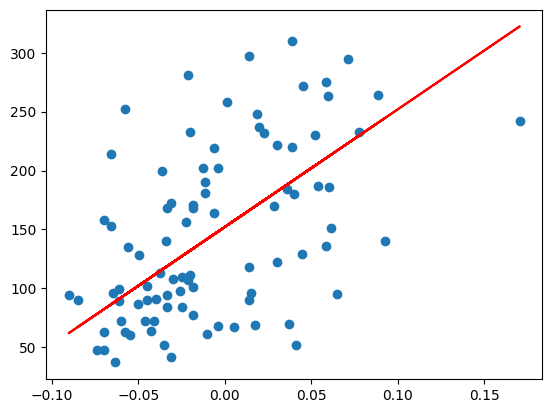

In [28]:
from matplotlib import pyplot as plt

plt.scatter(x=test_X[:, None, col_number], y=test_y)
plt.plot(test_X[:, None, col_number], predictions, color="red")
plt.show()

### Ćwiczenie
Znajdź wartości współczynników a i b równania y=ax+b.

hint:
poszukaj w dokumentacji `LinearRegression` w sklearn

In [29]:
regr.coef_

array([998.57768914])

### Ćwiczenie
Policz błąd średniokwadratowy korzystając z funkcji `mean_squared_error` z `sklearn.metrics`.

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=test_y, y_pred=predictions)
print(f"Mean squared error {mse}")

Mean squared error 4061.8259284949268


### Ćwiczenie
Zaimplementuj własną wersję błędu średniokwadratowego (zdefiniuj własną funkcję) i sprawdź zgodność wyniku z powyższym.

Niech funkcja przyjmuje: etykiety, jedną cechę (BMI), współczynnik (jeden) modelu i wyraz wolny, a zwraca liczbę - MSE.

In [31]:
# Define custom mean_squared_error function
def custom_mse(labels, feature, coefficient, intercept):
    predictions = coefficient * feature + intercept
    mse = ((labels - predictions) ** 2).mean()
    return mse

# Sklearn mse result
print(mse)

# Custom mse result
custom_mse_result = custom_mse(labels=test_y, feature=test_X[:, None, col_number], coefficient=regr.coef_, intercept=regr.intercept_)
print(custom_mse_result)

4061.8259284949268
7629.181166908971


### Ćwiczenie
Dopasuj model regresji liniowej do wszystkich kolumn zbiorze danych i znajdź współczynniki modelu.

Które cechy ze zbioru danych mają największe znaczenie dla przewidywanej wartości?


In [32]:
# Get the number of columns in the dataset
col_amount = len(labels)

# Run LinearRegression model for each of the labels
for col in range(col_amount):
    regr.fit(X=train_X[:, None, col], y=train_y)
    pred = regr.predict(X=test_X[:, None, col])
    coef = regr.coef_
    print(f"Col #{col} ({labels[col]}): {coef}")

Col #0 (age): [331.072172]
Col #1 (sex): [11.65943135]
Col #2 (bmi): [998.57768914]
Col #3 (bp): [716.33054342]
Col #4 (s1): [325.97614462]
Col #5 (s2): [253.89849723]
Col #6 (s3): [-637.18957587]
Col #7 (s4): [694.36445424]
Col #8 (s5): [901.23434237]
Col #9 (s6): [629.85314634]


### Ćwiczenie
Zaimplementuj błąd średniokwadratowy dla wielu kolumn jednocześnie (wiele cech) i porównaj z `mean_squared_error`.

Niech funkcja przyjmuje: etykiety, wszystkie cechy, współczynniki modelu, wyraz wolny i zwraca liczbę.

In [33]:
def multi_column_mse(labels, features, coefficient, intercept):
    col_amount = features.shape[1]
    mse = 0
    for col in range(col_amount):
        pred = coefficient * features[:, col] + intercept
        mse += ((labels - pred) ** 2).mean()
    return mse

# Sklearn mse result
print(mse)

# Multi column mse result
multi_column_mse_result = multi_column_mse(labels=test_y, features=test_X, coefficient=regr.coef_, intercept=regr.intercept_)
print(multi_column_mse_result)

4061.8259284949268
50447.976793649956
